<a href="https://colab.research.google.com/github/Sameer581/DUPA/blob/B1/Sharda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Data Reading</h1>

In [ ]:
import pandas as pd
import numpy as np

#Extracting data from csv file
data = pd.read_csv("UP018.csv")
#Top 5 records of pollution data in Greater Noida
data.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,MP-Xylene (ug/m3),Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),Xylene (ug/m3),AT (degree C),RF (mm)
0,2019-02-27 17:00:00,2019-02-27 18:00:00,33.75,99.00,2.65,48.60,28.00,16.73,61.27,0.37,...,NaN,27.00,48.25,0.72,278.00,41.25,741.0,NaN,18.58,NaN
1,2019-02-27 18:00:00,2019-02-27 19:00:00,40.75,116.75,3.00,63.52,36.20,15.38,24.83,0.49,...,NaN,26.88,51.25,0.67,275.00,18.25,741.0,NaN,17.75,NaN
2,2019-02-27 19:00:00,2019-02-27 20:00:00,48.75,139.75,6.35,84.77,50.25,17.38,24.90,0.83,...,NaN,26.85,56.25,0.50,233.75,17.00,741.0,NaN,16.80,NaN
3,2019-02-27 20:00:00,2019-02-27 21:00:00,63.00,158.50,8.05,89.50,54.10,21.55,27.13,1.07,...,NaN,27.02,59.00,0.45,236.25,17.00,742.0,NaN,16.15,NaN
4,2019-02-27 21:00:00,2019-02-27 22:00:00,85.00,167.25,9.15,87.10,53.77,25.92,31.07,1.07,...,NaN,27.25,64.00,0.43,257.75,17.00,742.0,NaN,15.38,NaN


In [ ]:
# Feature information along with Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35839 entries, 0 to 35838
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   From Date            35839 non-null  object 
 1   To Date              35839 non-null  object 
 2   PM2.5 (ug/m3)        34096 non-null  float64
 3   PM10 (ug/m3)         34151 non-null  float64
 4   NO (ug/m3)           33328 non-null  float64
 5   NO2 (ug/m3)          32736 non-null  float64
 6   NOx (ppb)            33454 non-null  float64
 7   NH3 (ug/m3)          33336 non-null  float64
 8   SO2 (ug/m3)          32968 non-null  float64
 9   CO (mg/m3)           31831 non-null  float64
 10  Ozone (ug/m3)        32944 non-null  float64
 11  Benzene (ug/m3)      25555 non-null  float64
 12  Toluene (ug/m3)      25547 non-null  float64
 13  Eth-Benzene (ug/m3)  0 non-null      float64
 14  MP-Xylene (ug/m3)    0 non-null      float64
 15  Temp (degree C)      34462 non-null 

<h1>Data Cleaning</h1>

In [ ]:
# Dimentionality Reduction
# Dropping unnecessary columns from the dataset

data = data.drop(['To Date','NO (ug/m3)','NO2 (ug/m3)','NOx (ppb)','NH3 (ug/m3)','SO2 (ug/m3)','Ozone (ug/m3)','Benzene (ug/m3)','Toluene (ug/m3)','Eth-Benzene (ug/m3)','MP-Xylene (ug/m3)','RH (%)','WS (m/s)','Temp (degree C)','WD (degree)','SR (W/mt2)','BP (mmHg)','Xylene (ug/m3)','AT (degree C)','RF (mm)'],axis = 1)
data.head()

,From Date,PM2.5 (ug/m3),PM10 (ug/m3),CO (mg/m3)
0,2019-02-27 17:00:00,33.75,99.00,0.37
1,2019-02-27 18:00:00,40.75,116.75,0.49
2,2019-02-27 19:00:00,48.75,139.75,0.83
3,2019-02-27 20:00:00,63.00,158.50,1.07
4,2019-02-27 21:00:00,85.00,167.25,1.07


In [ ]:
# Dimension of our dataset
data.shape

(35839, 4)

In [ ]:
#Renaming columns/feature names
data = data.rename(columns = {'From Date':'Date','PM2.5 (ug/m3)':'PM2.5','PM10 (ug/m3)':'PM10','CO (mg/m3)':'CO'})
print(data.columns)

Index(['Date', 'PM2.5', 'PM10', 'CO'], dtype='object')


We have total of 5 features and 35,839 records

In [ ]:
# Checking column wise null values existence
data_null_record = data.isnull().sum()
print(data_null_record)

Date        0
PM2.5    1743
PM10     1688
CO       4008
dtype: int64


We have total of ***20.75%*** of data missing after including CO (mg/m3) feature as important feature<br>
While We have total of ***9.573%*** of data missing without including CO (mg/m3) feature as important feature.

In [ ]:
# Dropping records containing null values in PM2.5 and PM10 because Pollution data can not be predicted without these two factors
data = data.dropna(subset=['PM2.5','PM10'])

In [ ]:
#Filling CO remaining null values with previous ones because in one hour there is not a big variance in the CO amount.
data = data.ffill()

In [ ]:
#Checking New dimension(shape) of our data set
print(data.shape)

(33822, 4)


Initially we have 35,839 records<br>Now we have 33,822 records.<br>

*   Total records dropped = 35,839 - 33,822 = ***2,017***
*   i.e., ***5.62%*** of records dropped with respect to PM2.5 and PM10 features



In [ ]:
# Checking what type of data our features containing
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 33822 entries, 0 to 35838
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    33822 non-null  object 
 1   PM2.5   33822 non-null  float64
 2   PM10    33822 non-null  float64
 3   CO      33822 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB
None


Date - Object data<br>
PM2.5, PM10 and CO - float data

In [ ]:
#We need to convert our Date feature into datetime format
data['Date'] = pd.to_datetime(data['Date'])
print(data.head())

                 Date  PM2.5    PM10    CO
0 2019-02-27 17:00:00  33.75   99.00  0.37
1 2019-02-27 18:00:00  40.75  116.75  0.49
2 2019-02-27 19:00:00  48.75  139.75  0.83
3 2019-02-27 20:00:00  63.00  158.50  1.07
4 2019-02-27 21:00:00  85.00  167.25  1.07


In [ ]:
data.info('Date')

<class 'pandas.core.frame.DataFrame'>
Index: 33822 entries, 0 to 35838
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    33822 non-null  datetime64[ns]
 1   PM2.5   33822 non-null  float64       
 2   PM10    33822 non-null  float64       
 3   CO      33822 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 MB


In [ ]:
#function to categorise seasons according to month number
def month_to_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

In [ ]:
#New feature creations: Year, Month, Date, Hour, Seasons

data['Hour'] = data['Date'].dt.hour
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Season'] = data['Date'].dt.month.apply(month_to_season)
#Now Drop Date column
data = data.drop(['Date'],axis = 1)
data.head(-10)

,PM2.5,PM10,CO,Hour,Year,Month,Day,Season
0,33.75,99.00,0.37,17,2019,2,27,Winter
1,40.75,116.75,0.49,18,2019,2,27,Winter
2,48.75,139.75,0.83,19,2019,2,27,Winter
3,63.00,158.50,1.07,20,2019,2,27,Winter
4,85.00,167.25,1.07,21,2019,2,27,Winter
...,...,...,...,...,...,...,...,...
35823,21.75,48.25,1.96,8,2023,3,31,Spring
35824,17.50,48.00,1.58,9,2023,3,31,Spring
35825,8.00,27.00,1.68,10,2023,3,31,Spring
35827,13.00,40.00,1.58,12,2023,3,31,Spring


<h3>OUTLIER REMOVAL</h3>
<p>To continue with the removal we have two optimal approaches: <ol><li>Z_score</li><li>IQR</li></ol>
<p>To check which approach is appropriate to our data we will check data distribution of PM2.5 and PM10</p>

In [ ]:
#Checking skewness of the data
df = pd.DataFrame(data)
df = df[['PM2.5','PM10','CO']]
skewness = df.skew()
print(skewness)

PM2.5    2.339091
PM10     1.462596
CO       2.806094
dtype: float64


<p>As we can see the skewness value of PM2.5, PM10 and CO all are over 1 that means our data is **HIGHLY RIGHT SKEWED**(>1) That means IQR will be the best method for outlier removal as Z_Score work on mainly normal distributed data.</p>

In [ ]:
for col in df.columns:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()
    print(f"{col} - Mean: {mean}, Median: {median}, Mode: {mode}")

PM2.5 - Mean: 95.0239965111466, Median: 60.25, Mode: 0    34.0
Name: PM2.5, dtype: float64
PM10 - Mean: 211.14313050677075, Median: 177.0, Mode: 0    62.0
Name: PM10, dtype: float64
CO - Mean: 1.319413103896872, Median: 0.89, Mode: 0    3.57
Name: CO, dtype: float64


<h5>As in both PM2.5 and PM10 we have values like Mean>Median>Mode that confirm out data is highy right skewed</h5>

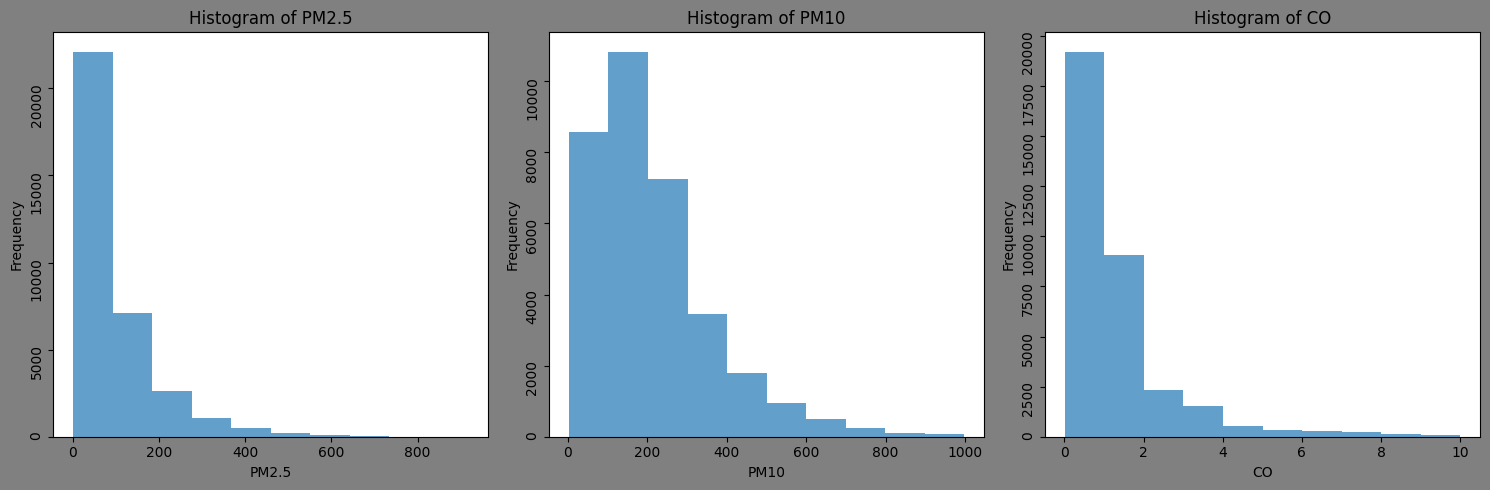

In [ ]:
# import matplotlib.pyplot as plt

# Plot histograms to visually check skewness
import matplotlib.pyplot as plt

# Create a figure with custom size (width, height)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), facecolor='gray')

# Plot histogram for PM2.5
axes[0].hist(df['PM2.5'], bins=10, alpha=0.7)
axes[0].set_title(f"Histogram of PM2.5")
axes[0].set_xlabel('PM2.5')
axes[0].set_ylabel("Frequency")
axes[0].tick_params(axis='y', rotation=90)

# Plot histogram for PM10
axes[1].hist(df['PM10'], bins=10, alpha=0.7)
axes[1].set_title("Histogram of PM10")
axes[1].set_xlabel('PM10')
axes[1].set_ylabel("Frequency")
axes[1].tick_params(axis='y', rotation=90)

# Plot histogram for CO
axes[2].hist(df['CO'], bins=10, alpha=0.7)
axes[2].set_title("Histogram of CO")
axes[2].set_xlabel('CO')
axes[2].set_ylabel("Frequency")
axes[2].tick_params(axis='y', rotation=90)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plot
plt.show()


<p>As we can see the graph is also highly righ skewed</p>

In [ ]:
#IQR for Outlier removal technique
final_data = data.copy()
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only rows within the bounds
    final_data = final_data[(final_data[feature] >= lower_bound) & (final_data[feature] <= upper_bound)]

In [ ]:
final_data.shape

(28931, 8)

<p>After removing outliers we have total 31,281 records i.e., 33,822-28,931= 4,891 records are eliminated as outlier. i.e.,<b><i> 14.461%</i></b> of non-null data.</p>

In [ ]:
final_data.head()

,PM2.5,PM10,CO,Hour,Year,Month,Day,Season
0,33.75,99.00,0.37,17,2019,2,27,Winter
1,40.75,116.75,0.49,18,2019,2,27,Winter
2,48.75,139.75,0.83,19,2019,2,27,Winter
3,63.00,158.50,1.07,20,2019,2,27,Winter
4,85.00,167.25,1.07,21,2019,2,27,Winter


<Figure size 1000x500 with 0 Axes>

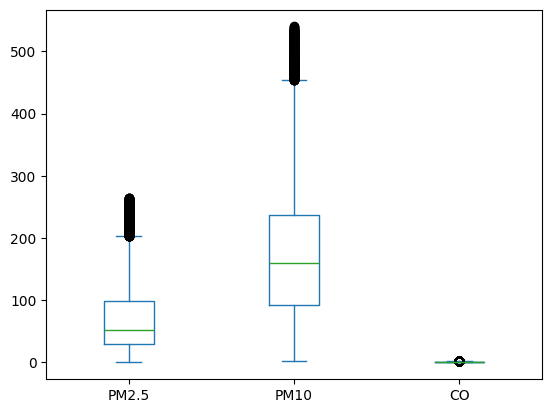

In [ ]:
#BOX PLOT of the data
plt.figure(figsize=(10,5))
box_data = final_data[['PM2.5','PM10','CO']]
box_data.plot(kind='box')
plt.show()

<h1>Data Visualization</h1>

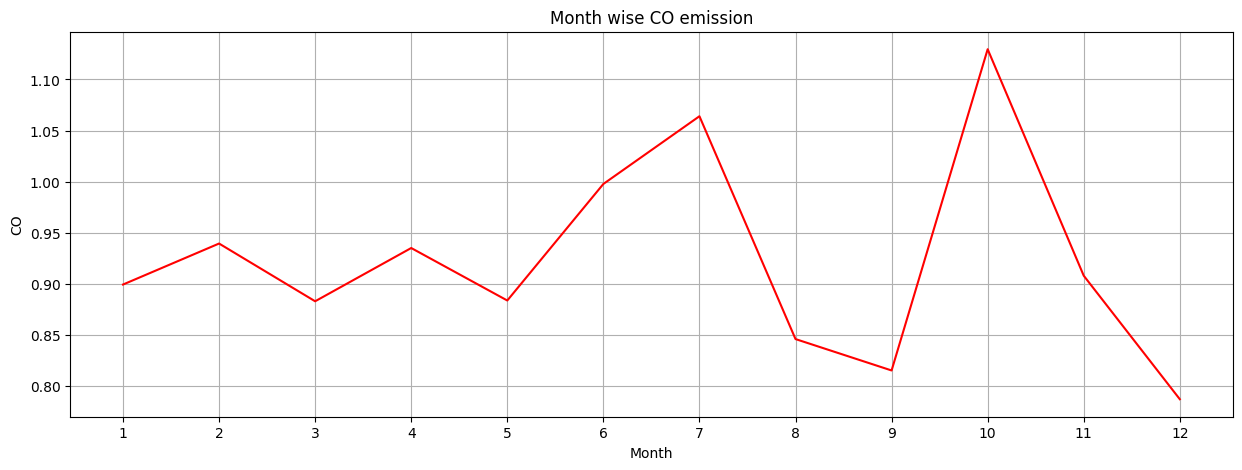

In [ ]:
# Month wise CO emission
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(final_data.groupby('Month')['CO'].mean(), color='red')
plt.xlabel('Month')
plt.ylabel('CO')
plt.title('Month wise CO emission')
plt.xticks(np.arange(1,13,1))
plt.grid(True)
plt.show()

<p>October and July: These month exhibits the highest CO emission.

February and April: These months show moderate CO levels.

September and August: These months show lowest CO levels.
</p>

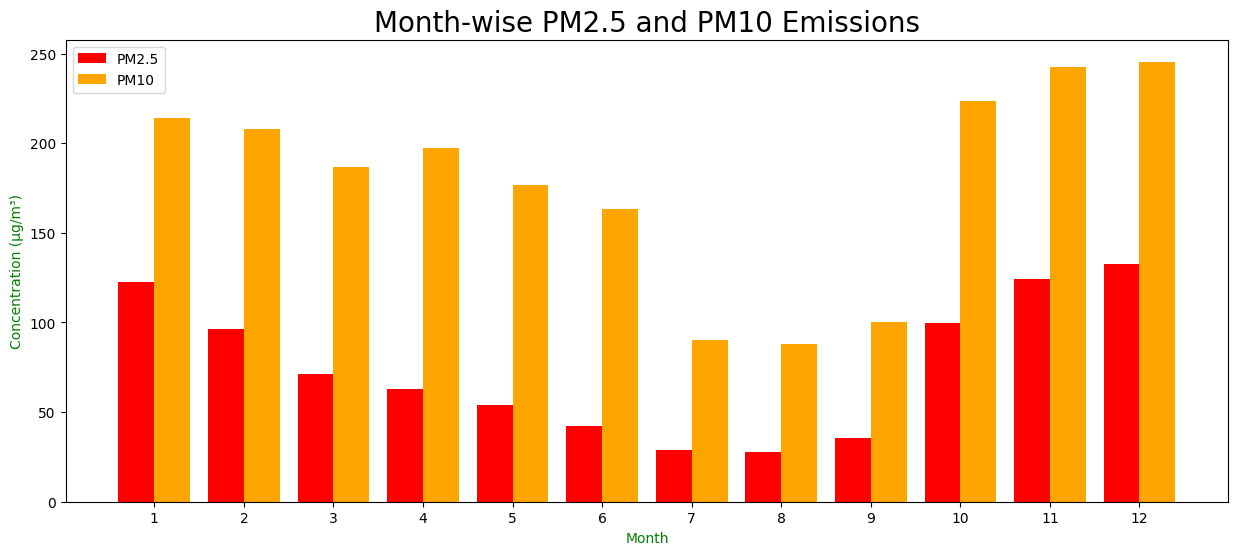

In [ ]:
monthly_pm25 = final_data.groupby('Month')['PM2.5'].mean()
monthly_pm10 = final_data.groupby('Month')['PM10'].mean()

x = np.arange(1, 13)
width = 0.4

plt.figure(figsize=(15, 6))

plt.bar(x - width/2, monthly_pm25, width=width, label='PM2.5', color='red')
plt.bar(x + width/2, monthly_pm10, width=width, label='PM10', color='orange')

plt.xlabel('Month',fontsize=10,color='green')
plt.ylabel('Concentration (µg/m³)', fontsize=10,color='green')
plt.title('Month-wise PM2.5 and PM10 Emissions',fontsize=20,color='black')
plt.xticks(x)
plt.legend()
plt.show()


<p>
1.   PM10 consistently has higher concentrations than PM2.5, indicating a dominance of larger particulate matter.<br>
2.   November and December: These months show the highest concentrations for both PM2.5 and PM10. <br>
3.   January and February: High levels of particulate matter persist.<br>
4. July and August: The lowest levels for both PM2.5 and PM10 are observed during these months, coinciding with the monsoon season.




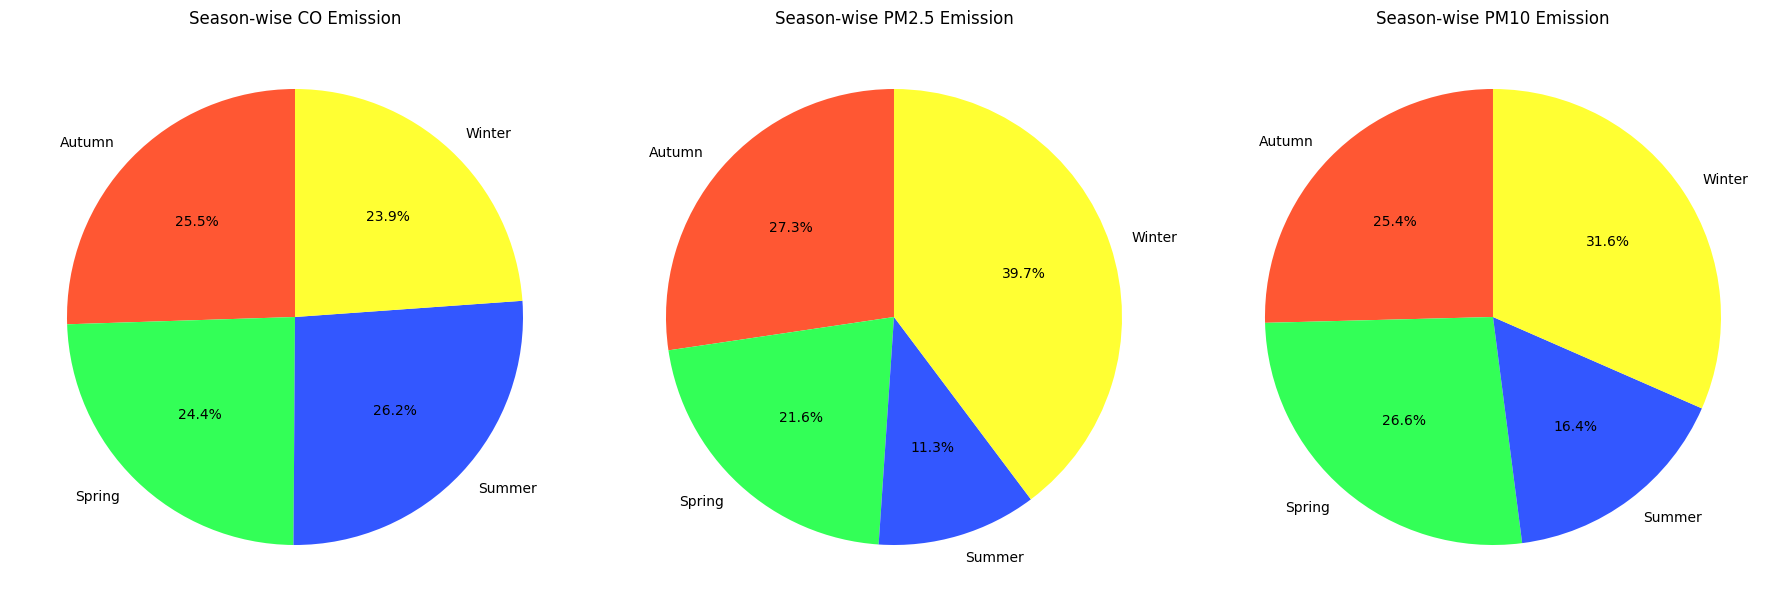

In [ ]:
seasonal_co = final_data.groupby('Season')['CO'].mean()
seasonal_pm25 = final_data.groupby('Season')['PM2.5'].mean()
seasonal_pm10 = final_data.groupby('Season')['PM10'].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].pie(seasonal_co, labels=seasonal_co.index, autopct='%1.1f%%', startangle=90, colors=['#FF5733', '#33FF57', '#3357FF', '#FFFF33'])
axes[0].set_title("Season-wise CO Emission")

axes[1].pie(seasonal_pm25, labels=seasonal_pm25.index, autopct='%1.1f%%', startangle=90, colors=['#FF5733', '#33FF57', '#3357FF', '#FFFF33'])
axes[1].set_title("Season-wise PM2.5 Emission")

axes[2].pie(seasonal_pm10, labels=seasonal_pm10.index, autopct='%1.1f%%', startangle=90, colors=['#FF5733', '#33FF57', '#3357FF', '#FFFF33'])
axes[2].set_title("Season-wise PM10 Emission")
plt.tight_layout()
plt.show()


<p>PM2.5 Emission:

Highest: Winter (39.7%) - Caused by temperature inversions, biomass burning, and stagnant air.

Lowest: Summer (11.3%) - Due to better air dispersion from winds and rainfall.


PM10 Emission:

Highest: Winter (31.6%) - Similar reasons as PM2.5, with trapped larger particles.

Second Highest: Spring (26.6%) - Likely caused by dust and construction activity.

Lowest: Summer (16.4%) - Wind and rain reduce particulate matter.
</p>
<p>BUT MOST IMPORTANT POINT: The CO(mg/m3) level is almost same in all seasons despite even Summer still has highest CO level than other seasons that is 26.2%</p>

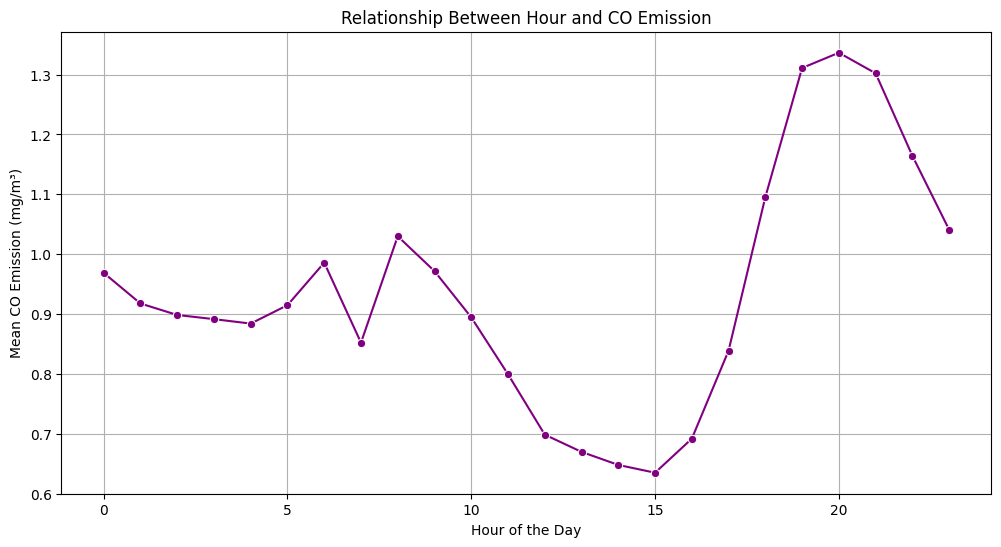

In [ ]:
# Relation between Hours of the days and CO emission level
import seaborn as sns

hourly_co = final_data.groupby('Hour')['CO'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_co, x='Hour', y='CO', marker='o', color='purple')

plt.xlabel('Hour of the Day')
plt.ylabel('Mean CO Emission (mg/m³)')
plt.title('Relationship Between Hour and CO Emission')
plt.grid(True)
plt.show()


<p><ul><li>Morning Peak (Around 7 AM–10 AM): commute timing</li>
<li>Midday Decline (Around 11 AM–3 PM)</li>
<li>Evening Surge (Around 5 PM–9 PM): Rush Time </li>
<li>Late-Night Decline (After 9 PM)</li>

The graph exhibits a <u><b><i>bimodal distribution</i></b></u>
A small peak in the morning (commuting hours).
A major peak in the evening (rush hours), followed by a late-night decline.
Low Levels Around Early Morning (Midnight–6 AM)

Early morning hours (midnight to 6 AM) have the lowest CO emission levels.</p>

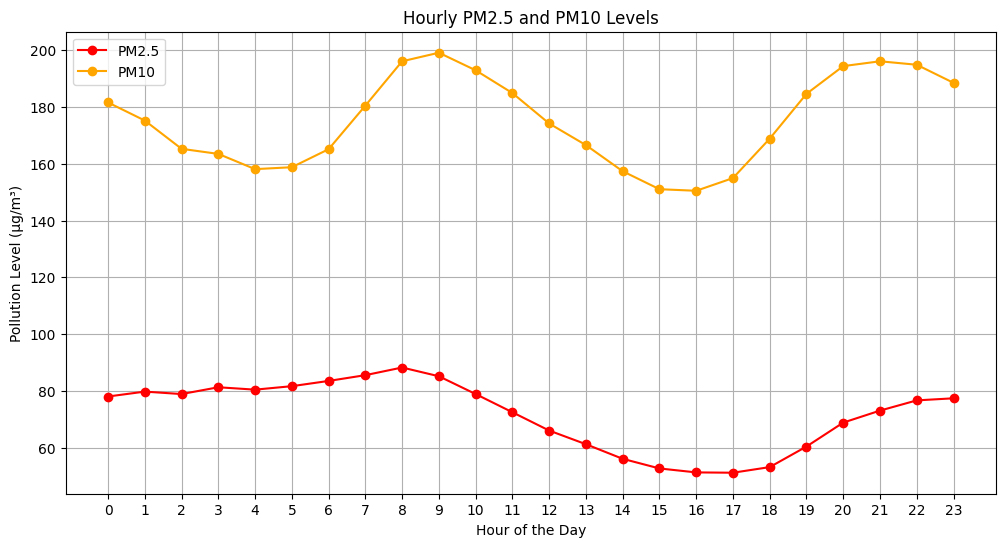

In [ ]:

hourly_pm25 = final_data.groupby('Hour')['PM2.5'].mean()
hourly_pm10 = final_data.groupby('Hour')['PM10'].mean()
plt.figure(figsize=(12, 6))
plt.plot(hourly_pm25.index, hourly_pm25, label='PM2.5', marker='o', color='red')
plt.plot(hourly_pm10.index, hourly_pm10, label='PM10', marker='o', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Pollution Level (µg/m³)')
plt.title('Hourly PM2.5 and PM10 Levels')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()


1. PM2.5 Levels (Red Line):


*   Relatively stable throughout the day.
*   Slight peaks during early morning (6–9 AM) and evening (6–9 PM), coinciding with rush hours.
*    Lowest levels observed during midday (10 AM–4 PM) due to reduced traffic and better atmospheric dispersion.















2. PM10 Levels (Yellow Line):

*   Exhibits a bimodal pattern with significant peaks in the morning (6–9 AM) and late afternoon (3–6 PM).

*   Lowest levels occur around midnight to early morning (12 AM–5 AM) and midday.



3. General Trend:

PM10 levels are consistently higher than PM2.5 throughout the day, indicating significant contributions from larger particulate sources

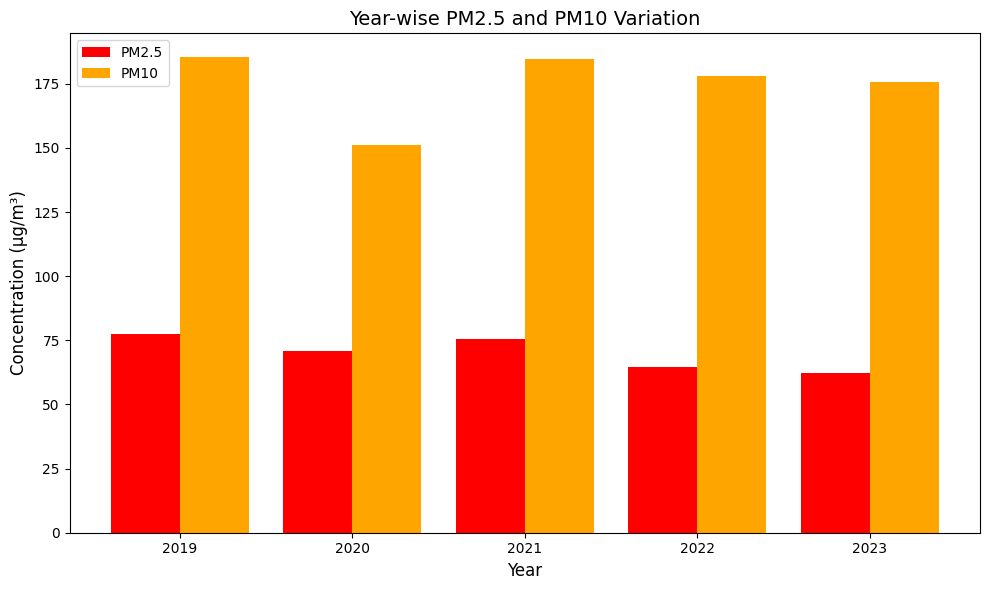

In [ ]:
# Yearly(2019 to 2023) PM2.5 and PM10 variations

yearly_avg = final_data.groupby('Year')[['PM2.5', 'PM10']].mean().reset_index()
width = 0.4
x = np.arange(len(yearly_avg['Year']))
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, yearly_avg['PM2.5'], width=width, color='red', label='PM2.5')
plt.bar(x + width/2, yearly_avg['PM10'], width=width, color='orange', label='PM10')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Concentration (µg/m³)', fontsize=12)
plt.title('Year-wise PM2.5 and PM10 Variation', fontsize=14)
plt.xticks(x, yearly_avg['Year'], fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()


<p><li>Both PM2.5 and PM10 levels remain consistently high over the years.</li><li>PM10 concentrations are significantly higher than PM2.5 concentrations in every year, indicating a higher prevalence of coarse particulate matter compared to   fine particulate matter.</li><li>2019 shows notably higher PM2.5 and PM10 levels compared to subsequent years.</li><li>We can see an gradual declination of the pm10 in 2020 indicating some changes in trends that need to be observed.</li><li>From 2021 onwards, PM10 levels remain consistently high, showing minimal variation.</li>

<h1>Machine Learning Model</h1>

In [ ]:
season_mapping = {'Summer': 0, 'Autumn': 1, 'Winter': 2, 'Spring': 3}
final_data['Season'] = final_data['Season'].map(season_mapping)
final_data.head()

,PM2.5,PM10,CO,Hour,Year,Month,Day,Season
0,33.75,99.00,0.37,17,2019,2,27,2
1,40.75,116.75,0.49,18,2019,2,27,2
2,48.75,139.75,0.83,19,2019,2,27,2
3,63.00,158.50,1.07,20,2019,2,27,2
4,85.00,167.25,1.07,21,2019,2,27,2


<p>We renamed our seasons into numerical indexes to include it into our prediction model</p>

In [ ]:
!pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.8 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=60de7ea039a3d35f24b2aa50590b6d9724941d4b3a1499be672a176d78dfd0df
  Stored in directory: /root/.cache/pip/wheels/da/77/2d/adbc56bc4db95ad80c6d4e71cd69e2d9d122174904342e3f7f
Successfully built stopit


In [ ]:
from tpot import TPOTRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for tpot
X = final_data[['Hour', 'Month', 'Day', 'Season', 'CO']]
y = final_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TPOTRegressor object
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

# Fit the TPOT object to the training data
tpot.fit(X_train, y_train)

# Print the best pipeline found by TPOT
print(tpot.fitted_pipeline_)

# Predict on the test data
y_pred = tpot.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Export the best pipeline to a Python file
tpot.export('tpot_exported_pipeline.py')

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -967.864170318481

Generation 2 - Current best internal CV score: -950.9688400492238

Generation 3 - Current best internal CV score: -950.9688400492238

Generation 4 - Current best internal CV score: -950.9688400492238

Generation 5 - Current best internal CV score: -937.1706627388878

Best pipeline: RandomForestRegressor(RandomForestRegressor(input_matrix, bootstrap=True, max_features=1.0, min_samples_leaf=2, min_samples_split=16, n_estimators=100), bootstrap=False, max_features=0.1, min_samples_leaf=13, min_samples_split=2, n_estimators=100)
Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=RandomForestRegressor(min_samples_leaf=2,
                                                                   min_samples_split=16,
                                                                   random_state=42))),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, max

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error: 920.1733340340501
R-squared: 0.7154181284936365


<h4>We used TPOT(Tree Based Pipeline Optimisation Tool) to automate our model selection and hyperparameter optimisation resulting in random forest regressor for air quality analysis for our dataset.</h4>

In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Prediction model for PM2.5
X = final_data[['Hour', 'Day', 'Month', 'Year', 'CO', 'Season']]
y = final_data['PM2.5']
z = final_data['PM10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X2_train, X2_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=43)

In [184]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [185]:
print(X_train.shape)
print(X2_train.shape)

(23144, 6)
(23144, 6)


In [186]:
print(X_test.shape)
print(X2_test.shape)

(5787, 6)
(5787, 6)


<p>Hyperparameter tuning helps optimize the performance of the Random Forest model by finding the best combination of parameters that minimize the error and prevent overfitting.
</p>

In [187]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

<p>1. 'n_estimators': Controls the number of trees. More trees typically improve accuracy but increase computational cost.<br>
2. 'max_depth': Limits the depth of each tree. A depth of 'None' allows full growth, while smaller depths reduce overfitting.<br>
3. 'min_samples_split': Ensures a minimum number of samples needed to split a node, helping control tree branching.<br>
4. 'min_samples_leaf': Prevents overly complex trees by requiring a minimum number of samples at each leaf node.</p>

In [188]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=param_grid,n_iter=10,cv=3,verbose=2,n_jobs=-1)

In [174]:
random.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

In [175]:
model_param = random.best_params_

In [176]:
model_param

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

<p>
  1. A moderate number of trees (100) is used here, which provides a balance between model performance and computational efficiency.
 A higher number of estimators typically increases accuracy but also increases training time.

2. A value of 2 means that any node with at least 2 samples can be split, allowing the model to grow deeper trees.
While this can result in high model flexibility, it can increase the risk of overfitting if the dataset is noisy or small.
3. A value of 1 allows the tree to grow very specific branches, capturing fine details in the data.
4. A value of None means the trees can grow until all leaves are pure or contain fewer than min_samples_split samples.Allows the model to grow fully and capture all patterns in the data and improving accuracy.

</p>

In [177]:
forest = RandomForestRegressor(n_estimators=100,min_samples_split=2,min_samples_leaf=1,max_depth=None)

In [178]:
forest.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [179]:
y_pred = forest.predict(X_test_scaled)
y_pred

array([ 48.0526, 144.4675,  67.6489, ..., 196.3578,  23.0266, 124.2325])

In [180]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE: ",np.sqrt(mse))
print(f'R-squared: {r2}')

RMSE:  21.360812993164355
R-squared: 0.8588850119214094


In [181]:
accuracy = forest.score(X_test_scaled,y_test)
print(accuracy)

0.8588850119214094


<p>

<h3> We are getting error of about 21% and our model accuracy rate is</h3> <h2>85.88%</h2> <h3>i.e., about 86% </h3>